In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
trips = pd.read_csv('data/trip.csv')

# Cantidad de viajes según la hora

In [3]:
trips_by_hr = trips[['start_date']]

In [4]:
# Llevo todas las fechas a formato DateTime
trips_by_hr.start_date = pd.to_datetime(trips_by_hr.start_date, format='%m/%d/%Y %H:%M')

/home/carlos/Documentos/7506-OrgaDatos/tp/ENV/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [5]:
# Cambio el nombre de la columna por "hour"
trips_by_hr.columns.values[0] = 'hour'

In [6]:
# Me quedo solo con la hora
trips_by_hr = trips_by_hr.apply(lambda x: x.dt.hour)

In [7]:
# Cuento la cantidad de viajes por cada hora
hours = {}
for d in trips_by_hr.values.flat:
    if d not in hours:
        hours[d] = 1
    else:
        hours[d] += 1

In [8]:
# Armo un df con las horas como índice y las cantidades como valores
trips_by_hr = pd.DataFrame.from_dict(hours, orient='index')
trips_by_hr['trips'] = trips_by_hr[0]
del trips_by_hr[0]
trips_by_hr.sort_index(inplace=True)

In [19]:
#plt.figure(figsize=(16,4))
#plt.plot(trips_by_hr)
#plt.grid()
#plt.xticks([i for i in range(0,25,2)])
#plt.title('Cantidad de viajes por hora')
#plt.xlabel('Hour')
#plt.ylabel('Trips')
#plt.autoscale(tight=True)
#plt.fill_between(trips_by_hr.index, trips_by_hr.trips, alpha=0.6)
#plt.show()

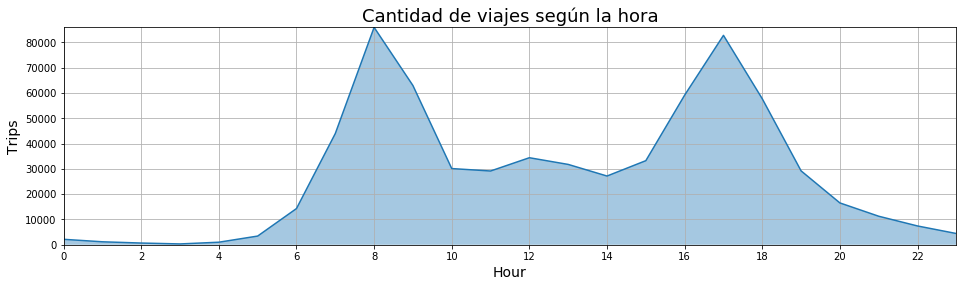

In [53]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,1,1)
ax.plot(trips_by_hr)
ax.grid()
ax.set_ylabel('Trips', fontsize=14)
ax.set_xlabel('Hour', fontsize=14)
ax.set_xticks([i for i in range(0,25,2)])
ax.fill_between(trips_by_hr.index, trips_by_hr.trips, alpha=0.4)
ax.set_title('Cantidad de viajes según la hora', fontsize=18)
ax.autoscale(tight=True)
plt.show(ax)